In [2]:
import pyforest
import scipy.stats as st

In [4]:
# tossing of coin three times, find the probobilities.
n = 3
p = 0.5
x = np.arange(0,4)

<IPython.core.display.Javascript object>

In [5]:
pmf = st.binom.pmf(x, n, p)
pmf

array([0.125, 0.375, 0.375, 0.125])

<IPython.core.display.Javascript object>

<BarContainer object of 4 artists>

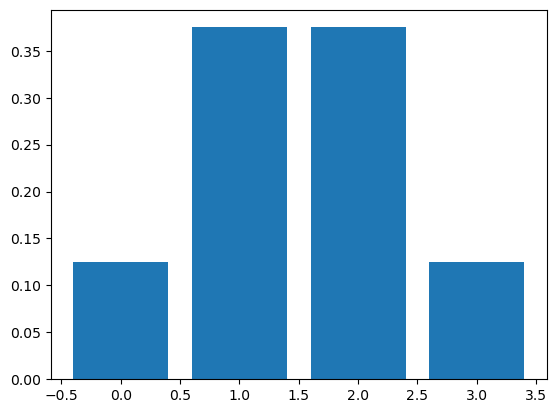

In [9]:
plt.bar(x, pmf) # Probability Mass Function bar chart

<IPython.core.display.Javascript object>

<BarContainer object of 4 artists>

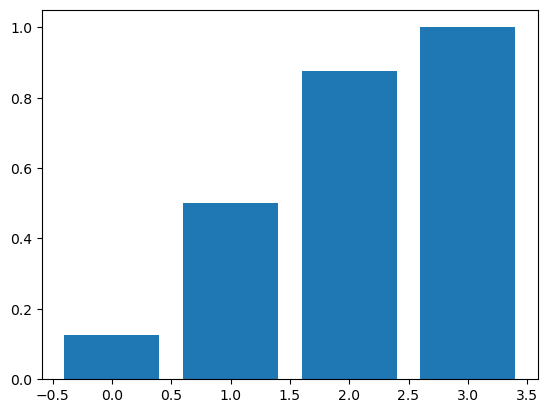

In [11]:
cp = st.binom.cdf(x, n , p)
plt.bar(x, cp) # Continuos Distribution Function bar chart

<IPython.core.display.Javascript object>

<BarContainer object of 4 artists>

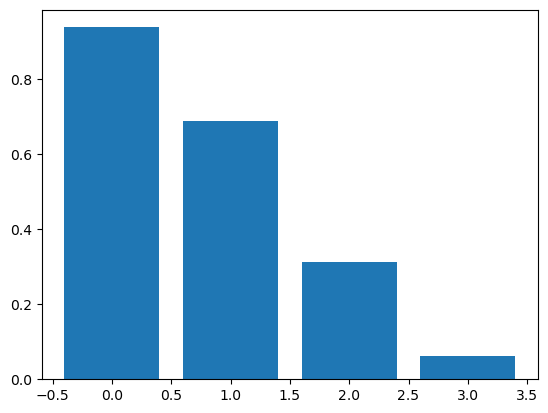

In [17]:
plt.bar(x, st.binom.sf(x - 1, n, p))

In a textile shop for every 25 customers 10 customers buy the product. on one day there are 40 customers visited the store what is the probability that ?
1. all 40 customers bu the product ?
2. none of the customers buy the product ?
3. at least 15 customers buy the product ?
4. Atmost 15 customers buy the product ?
5. exactly 20 customers buy the product ?


In [18]:
n = 40 # no of customers
p = 10/25 # the success rate given for 25 customers is 10.


In [21]:
# 1 P(X=40) = ?
print(st.binom.pmf(40, n, p))
# 2 P(X=0) = ?
print(st.binom.pmf(0, n, p))

1.2089258196146318e-16
1.3367494538843715e-09


In [23]:
# 3. P(X>=15) = ?
x = np.arange(15,41)
print(st.binom.pmf(x, n, p).sum()) 
print(st.binom.sf(14, n, p))

<IPython.core.display.Javascript object>

0.6825748397609652
0.682574839760966


In [25]:
# 4. P(X<=15) = ?
st.binom.cdf(15, n, p)

0.44022022364846136

In [29]:
print(st.binom.sf(14, n, p) + st.binom.cdf(15, n, p)) # we do get more than 1 because we are including 15 two times.
print(st.binom.sf(15, n, p) + st.binom.cdf(15, n, p)) # sum of survival and cumulative Distribution at any point is always equal to 1

1.1227950634094275
1.0


#### pmf -> is used to find the probability at given point
#### cdf -> is used to find the probability upto a given point like less than , atmost of any point.
#### sf -> is used to find the probability all the points from a given point like greater than , atleast of any point.

In [26]:
# 5. P(X=20) = ?
st.binom.pmf(20, n,p)

0.055414149064988975

In [31]:
st.binom.stats(3, 0.5) # it returns two values i.e Expected Value (E(X)) and Variance V(X)

(1.5, 0.75)